## Portfolio Exercise: Starbucks
<br>

<img src="https://opj.ca/wp-content/uploads/2018/02/New-Starbucks-Logo-1200x969.jpg" width="200" height="200">
<br>
<br>
 
#### Background Information

The dataset you will be provided in this portfolio exercise was originally used as a take-home assignment provided by Starbucks for their job candidates. The data for this exercise consists of about 120,000 data points split in a 2:1 ratio among training and test files. In the experiment simulated by the data, an advertising promotion was tested to see if it would bring more customers to purchase a specific product priced at $10. Since it costs the company 0.15 to send out each promotion, it would be best to limit that promotion only to those that are most receptive to the promotion. Each data point includes one column indicating whether or not an individual was sent a promotion for the product, and one column indicating whether or not that individual eventually purchased that product. Each individual also has seven additional features associated with them, which are provided abstractly as V1-V7.

#### Optimization Strategy

Your task is to use the training data to understand what patterns in V1-V7 to indicate that a promotion should be provided to a user. Specifically, your goal is to maximize the following metrics:

* **Incremental Response Rate (IRR)** 

IRR depicts how many more customers purchased the product with the promotion, as compared to if they didn't receive the promotion. Mathematically, it's the ratio of the number of purchasers in the promotion group to the total number of customers in the purchasers group (_treatment_) minus the ratio of the number of purchasers in the non-promotional group to the total number of customers in the non-promotional group (_control_).

$$ IRR = \frac{purch_{treat}}{cust_{treat}} - \frac{purch_{ctrl}}{cust_{ctrl}} $$


* **Net Incremental Revenue (NIR)**

NIR depicts how much is made (or lost) by sending out the promotion. Mathematically, this is 10 times the total number of purchasers that received the promotion minus 0.15 times the number of promotions sent out, minus 10 times the number of purchasers who were not given the promotion.

$$ NIR = (10\cdot purch_{treat} - 0.15 \cdot cust_{treat}) - 10 \cdot purch_{ctrl}$$

For a full description of what Starbucks provides to candidates see the [instructions available here](https://drive.google.com/open?id=18klca9Sef1Rs6q8DW4l7o349r8B70qXM).

Below you can find the training data provided.  Explore the data and different optimization strategies.

#### How To Test Your Strategy?

When you feel like you have an optimization strategy, complete the `promotion_strategy` function to pass to the `test_results` function.  
From past data, we know there are four possible outomes:

Table of actual promotion vs. predicted promotion customers:  

<table>
<tr><th></th><th colspan = '2'>Actual</th></tr>
<tr><th>Predicted</th><th>Yes</th><th>No</th></tr>
<tr><th>Yes</th><td>I</td><td>II</td></tr>
<tr><th>No</th><td>III</td><td>IV</td></tr>
</table>

The metrics are only being compared for the individuals we predict should obtain the promotion – that is, quadrants I and II.  Since the first set of individuals that receive the promotion (in the training set) receive it randomly, we can expect that quadrants I and II will have approximately equivalent participants.  

Comparing quadrant I to II then gives an idea of how well your promotion strategy will work in the future. 

Get started by reading in the data below.  See how each variable or combination of variables along with a promotion influences the chance of purchasing.  When you feel like you have a strategy for who should receive a promotion, test your strategy against the test dataset used in the final `test_results` function.

  * https://github.com/migdias/starbucks_porfolio
  * https://github.com/Surohitt/StarbucksPromotionStrategy/blob/master/Starbucks.ipynb
  * https://github.com/joshxinjie/Data_Scientist_Nanodegree/blob/master/starbucks_portfolio_exercise/Starbucks.ipynb

In [4]:
# load in packages
from itertools import combinations

from test_results import test_results, score
import numpy as np
import pandas as pd
import scipy as sp
import sklearn as sk
import scipy.stats as stats
from statsmodels.stats import proportion as proptests
import scipy.stats as stats
import math as mt
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

# load in the data
train_data = pd.read_csv('./training.csv')
train_data.head()

,ID,Promotion,purchase,V1,V2,V3,V4,V5,V6,V7
0,1,No,0,2,30.443518,-1.165083,1,1,3,2
1,3,No,0,3,32.159350,-0.645617,2,3,2,2
2,4,No,0,2,30.431659,0.133583,1,1,4,2
3,5,No,0,0,26.588914,-0.212728,2,1,4,2
4,8,Yes,0,3,28.044332,-0.385883,1,1,2,2


In [65]:
#Inputs: required alpha value (alpha should already fit the required test)
#Returns: z-score for given alpha
def get_z_score(alpha):
    return stats.norm.ppf(alpha)


In [6]:
test_group = train_data[train_data.Promotion == "Yes"]
control_group = train_data[train_data.Promotion == "No"]


n_all = train_data.shape[0]
n_test = test_group.shape[0]
n_control = control_group.shape[0]

In [7]:
# Checking the number of individuals in each group
print("The number who received the promotion: {} (test) and the number who did not: {} (control).".format(n_test,n_control))

The number who received the promotion: 42364 (test) and the number who did not: 42170 (control).


# Invariant Metric
### Analytical Approach according Data Scientist ND

\begin{equation*}\sigma (SD) = \sqrt{(p \cdot (1-p) \cdot n_{obs})}\ \ \  ????\end{equation*}
\begin{equation*}z=\frac{x-\mu}{\sigma} \ \ \ \ \ \  z = \frac{(n_{control}+0.5) - (p \cdot n_{obs})}{\sigma}\end{equation*}

https://ncalculators.com/math-worksheets/calculate-standard-deviation-from-probability-samples.htm

#### Explaining the Z-Score
When a frequency distribution is normally distributed, we can find out the probability of a score occurring by standardising the scores, known as standard scores (or __z scores__). The standard normal distribution simply converts the group of data in our frequency distribution such that the mean is 0 and the standard deviation is 1.


#### Probability Value p
We are using `p = 0.5` because for the Invariant Metric we assuming that both distributions (Control and Experiment) should have the same probability.

In [48]:
# Compute a z-score and p-value
p = 0.5
sd = np.sqrt((p * (1-p)) * n_all) # according to "Statistical Significance - Solution" - it should be multiplied by number of all samples but the formula

z = ((n_control + 0.5) - p * n_all) / sd
z_calc_alpha = get_z_score(0.05)

print("Standard Deviation: "+str(sd))
print("Z-Score from Alpha: "+str(z_calc_alpha)+" ???")
print("Z-Score: "+str(z))
print("???: "+ str(2 * stats.norm.cdf(z)))

Standard Deviation: 145.3736564856233
Z-Score from Alpha: -1.6448536269514729 ???
Z-Score: -0.6638066506192843
???: 0.5068140685419046


What is this third value called and why is it multiplied by 2 and what can I interpret or assume from this value?

### Simulated Approach according Data Scientist ND

In [29]:
# simulate outcomes under null, compare to observed outcome
p = 0.5
n_trials = 200_000

samples = np.random.binomial(n_all, p, n_trials)

print("???: "+ str(np.logical_or(samples <= n_control, samples >= (n_all - n_control)).mean()))

???: 0.50599


### Simulated Approach according other Notebook

Instead of shifting our distribution to an normal distribution by computing the z-score, we are now sampling the training data for several times to generate an normal distribution of the differences.

In [24]:
# Calculating a measurable statistic in the difference of our group sizes
Promotion_avg = ((train_data.Promotion == "Yes").sum())/train_data.shape[0]
Non_Promotion_avg = (train_data.Promotion == "No").sum()/train_data.shape[0]
sample_difference = Promotion_avg - Non_Promotion_avg

In [25]:
# Bootstraping our differences to get a model of the distribution for our null
differences = []
for _ in range(10000):
    bootsamp = train_data.sample(30000, replace=True)
    Promotion_avg = ((bootsamp.Promotion == "Yes").sum())/bootsamp.shape[0]
    Non_Promotion_avg = (bootsamp.Promotion == "No").sum()/bootsamp.shape[0]
    differences.append(Promotion_avg - Non_Promotion_avg)

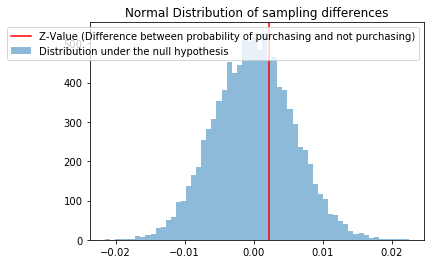

In [26]:
# Visualistion of our distribution 
null_vals = np.random.normal(0,np.std(differences),10000)
plt.hist(null_vals, bins=60 ,alpha=0.5)
plt.axvline(x=sample_difference ,color='red')
plt.title('Normal Distribution of sampling differences');
_ = plt.legend(["Z-Value (Difference between probability of purchasing and not purchasing)", "Distribution under the null hypothesis"])


In [33]:
# Determining the signifigance of our result 
p_val = (sample_difference>null_vals).mean()
print("???: "+str(p_val))

???: 0.6546


What is the value called and how does it differ from the values I'm asking for we calculated above?

### Calculating Confidence interval

Is this approach correct?

In [27]:
p=0.5
alpha = 0.05

In [49]:
purchases_cont=control_group.shape[0]
purchases_exp=test_group.shape[0]
all_purchases = purchases_cont+purchases_exp

p_hat=round(purchases_cont/all_purchases,4)
sd=np.sqrt((p*(1-p))/all_purchases)  # this formula shouldn't be this way ???
ME=round(get_z_score(1-(alpha/2))*sd,4)   # Margin Of Error
print ("The confidence interval is between",p-ME,"and",p+ME,"; Is",p_hat,"inside this range?")

The confidence interval is between 0.4966 and 0.5034 ; Is 0.4989 inside this range?


Our P value is well within our confidence interval and therefore we **fail to reject the null hypothesis**. This implies that there is no statistical signifigance in the difference of our sampling populations. Awesome! Now, lets move forward with the analysis :) 

# Evaluation Metric 



<center><font size="4">$SD_{pool}=\sqrt{\hat{p_{pool}}(1-\hat{p_{pool}}(\frac{1}{N_{cont}}+\frac{1}{N_{exp}})}$</font></center>
with <br> <center><font size="5"> $\hat{p_{pool}}=\frac{x_{cont}+x_{exp}}{N_{cont}+N_{exp}}$ </font></center>


As there are not a real Control and Experiment group I cannot use this following approach approach???

```python
# Count the total clicks from complete records only
clicks_cont=control["Clicks"].loc[control["Enrollments"].notnull()].sum()
clicks_exp=experiment["Clicks"].loc[experiment["Enrollments"].notnull()].sum()
```

```python
#Net Conversion - number of payments divided by number of clicks
payments_cont=control["Payments"].sum()
payments_exp=experiment["Payments"].sum()

NC_cont=payments_cont/clicks_cont
NC_exp=payments_exp/clicks_exp
NC_pooled=(payments_cont+payments_exp)/(clicks_cont+clicks_exp)
NC_sd_pooled=mt.sqrt(NC_pooled*(1-NC_pooled)*(1/clicks_cont+1/clicks_exp))
NC_ME=round(get_z_score(1-alpha/2)*NC_sd_pooled,4)
NC_diff=round(NC_exp-NC_cont,4)
print("The change due to the experiment is",NC_diff*100,"%")
print("Confidence Interval: [",NC_diff-NC_ME,",",NC_diff+NC_ME,"]")
print ("The change is statistically significant if the CI doesn't include 0. In that case, it is practically significant if",NC["d_min"],"is not in the CI as well.")
```

## Checking on Unknown Features

In [63]:
### my other code follows here

In [ ]:
def promotion_strategy(df):
    '''
    INPUT 
    df - a dataframe with *only* the columns V1 - V7 (same as train_data)

    OUTPUT
    promotion_df - np.array with the values
                   'Yes' or 'No' related to whether or not an 
                   individual should recieve a promotion 
                   should be the length of df.shape[0]
                
    Ex:
    INPUT: df
    
    V1	V2	  V3	V4	V5	V6	V7
    2	30	-1.1	1	1	3	2
    3	32	-0.6	2	3	2	2
    2	30	0.13	1	1	4	2
    
    OUTPUT: promotion
    
    array(['Yes', 'Yes', 'No'])
    indicating the first two users would recieve the promotion and 
    the last should not.
    '''
    
    
    
    
    return promotion

In [ ]:
# This will test your results, and provide you back some information 
# on how well your promotion_strategy will work in practice

test_results(promotion_strategy)

In [ ]:
# check which features are important

from xgboost import plot_importance
from matplotlib import pyplot

fig, ax = pyplot.subplots(figsize=(10, 18));
xgb.plot_importance(model, ax=ax);